# Pandas Exercises

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/escape2020/school2022](https://github.com/escape2020/school2022)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as ml
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print(f"Python version: {sys.version}\n"
      f"Pandas version: {pd.__version__}\n"
      f"NumPy version: {np.__version__}\n"
      f"Matplotlib version: {ml.__version__}\n"
      f"seaborn version: {sns.__version__}")

Python version: 3.9.12 (main, Mar 26 2022, 15:44:31) 
[Clang 13.1.6 (clang-1316.0.21.2)]
Pandas version: 1.4.2
NumPy version: 1.22.4
Matplotlib version: 3.5.2
seaborn version: 0.11.2


In [2]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

In [3]:
import warnings
warnings.filterwarnings('ignore')  # annoying UserWarnings from Jupyter/seaborn which are not fixed yet

## Exercise 1

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/neutrinos.csv`. You will encounter a few obstacles but make sure you don't modify the raw data. It's always a good idea to open the CSV file in question in an editor and see how it's formatted.

Every column of the resulting `DataFrame` needs to have a well defined `dtype` (something other than `object`).

**Notice: energies are measured in `GeV`, distances and positions in `m`, angles in radians and time in `ns` for all of the provided datasets.**

In [4]:
%shorterr neutrinos = pd.read_csv('data/neutrinos.csv')

SyntaxError: invalid syntax (<string>, line 1)


### Problems encountered

- the first few lines represent a plain header and need to be skipped
- comments are indicated with `$` at the beginning of the line
- the column separator is `:`
- the decimal delimiter is `,`
- the index column is the first one
- there is a footer to be excluded
- footer exclusion only works with the Python-engine

### Solution to exercise 1

In [5]:
!head -n 15 data/neutrinos.csv

Provided by Moritz Lotze, unformatted by Tamas Gal for teaching purposes,
Moritz would never hand out such a mess ;)

Have fun!

$ Column names
:azimuth:zenith:bjorkeny:energy:pos_x:pos_y:pos_z:proba_track:proba_cscd

$ Data
0:2,3495370211373316:1,1160038417256017:0,04899799823760986:3,3664000034332275:52,74:28,831:401,18600000000004:0,8243512974051896:0,17564870259481039
1:5,575785663044353:1,7428377336692398:0,28047099709510803:3,890000104904175:48,369:29,865:417,282:0,8183632734530938:0,18163672654690619
2:4,656124692722159:2,686909147834136:0,1198429986834526:3,2335000038146973:71,722:121,449:363,077:0,8283433133732535:0,17165668662674652
3:0,5204858401306308:1,939325715443025:0,06131500005722046:4,783999919891357:-47,592:-84,466:350,687:0,8423153692614771:0,15768463073852296
4:2,8569704309044184:1,6788966833786627:0,06146499887108803:3,983299970626831:-25,518:24,362:391,891:0,8622754491017964:0,1377245508982036
5:5,519597420755324:2,2190143556767175:0,15195700526237488:4,667799949

In [6]:
neutrinos = pd.read_csv('data/neutrinos.csv',
                        skiprows=5,
                        comment='$',
                        sep=':',
                        decimal=',',
                        index_col=0,
                        skipfooter=1,
                        engine='python')

In [7]:
neutrinos.head(3)

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
0,2.349537,1.116004,0.048998,3.3664,52.740,28.831,401.186,0.824351,0.175649
1,5.575786,1.742838,0.280471,3.8900,48.369,29.865,417.282,0.818363,0.181637
2,4.656125,2.686909,0.119843,3.2335,71.722,121.449,363.077,0.828343,0.171657


### Check the dtypes to make sure everthing is parsed correctly (and is not an `object`-array)

In [8]:
neutrinos.dtypes

azimuth        float64
zenith         float64
bjorkeny       float64
energy         float64
pos_x          float64
pos_y          float64
pos_z          float64
proba_track    float64
proba_cscd     float64
dtype: object

## Exercise 2

Create a histogram of the neutrino energies (`energy`).

### Solution to exercise 2

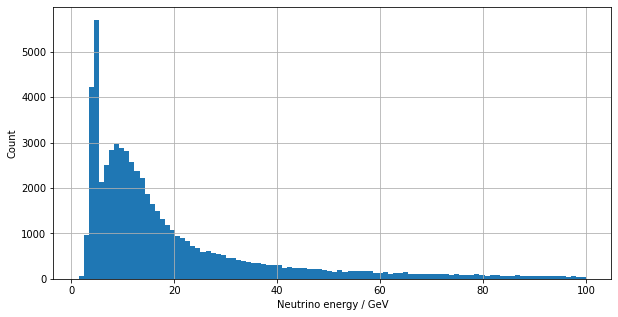

In [9]:
ax = neutrinos.energy.hist(bins=100)
ax.set(xlabel="Neutrino energy / GeV", ylabel="Count");

## Exercise 3

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/reco.csv`. The index column should be correctly parsed too. This dataset contains the reconstructed neutrinos to each of the neutrino events in the other data file.

### Problems encountered

- need to define index column

### Solution to exercise 3

In [10]:
reco = pd.read_csv('data/reco.csv', index_col=0)
reco.head()

,zenith,azimuth,energy_muon,energy_neutrino,bjorken_y,quality,pos_x,pos_y,pos_z
0,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818


## Exercise 4

Combine the `neutrinos` and `reco` `DataFrames`  into a single `DataFrame`. This way it will be easier to examine the MC and reconstruction parameters.

Hint: `pd.concat()`

### Problems encountered

- need to define the right axis
- identical column names should be avoided

### Solution to exercise 4

In [11]:
data = pd.concat([neutrinos, reco.add_prefix('reco_')], axis="columns")

In [12]:
data.head(3)

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z
0,2.349537,1.116004,0.048998,3.3664,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,5.575786,1.742838,0.280471,3.8900,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,4.656125,2.686909,0.119843,3.2335,71.722,121.449,363.077,0.828343,0.171657,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437


In [13]:
data.columns

Index(['azimuth', 'zenith', 'bjorkeny', 'energy', 'pos_x', 'pos_y', 'pos_z',
       'proba_track', 'proba_cscd', 'reco_zenith', 'reco_azimuth',
       'reco_energy_muon', 'reco_energy_neutrino', 'reco_bjorken_y',
       'reco_quality', 'reco_pos_x', 'reco_pos_y', 'reco_pos_z'],
      dtype='object')

## Exercise 5

Create a plot to visualise the zenith reconstruction quality (true vs. reconstructed zenith).

`data = pd.concat([neutrinos reco.add_prefix('reco_')], axis="columns")`

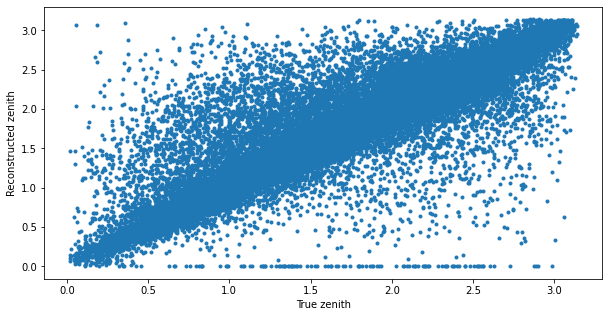

In [14]:
data.plot(x='zenith', y='reco_zenith', style='.',
          xlabel="True zenith", ylabel="Reconstructed zenith",
          legend=False);

### Solution to exercise 5, using `plt.scatter()`

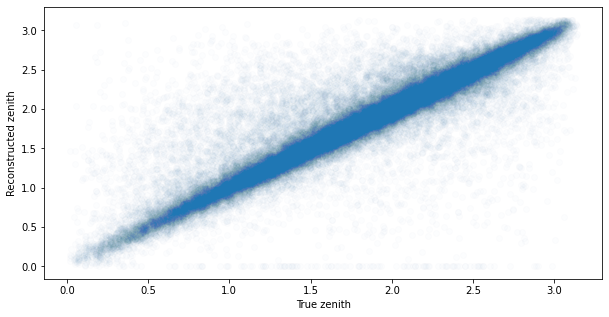

In [15]:
fig, ax = plt.subplots()
ax.scatter(data['zenith'], data['reco_zenith'], alpha=0.01);
ax.set_xlabel('True zenith');
ax.set_ylabel('Reconstructed zenith');

### Solution to exercise 5, using `plt.hist2d()`

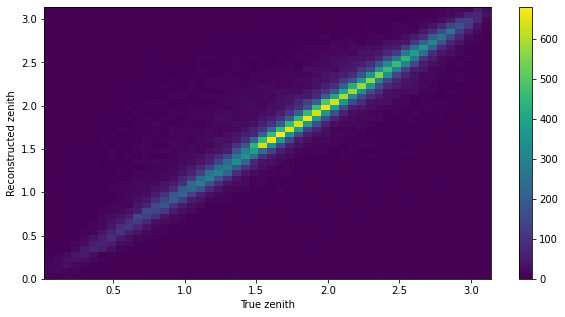

In [16]:
fig, ax = plt.subplots()
counts, xedges, yedges, im = ax.hist2d(data['zenith'], data['reco_zenith'], bins=50);
ax.set_xlabel('True zenith');
ax.set_ylabel('Reconstructed zenith');
fig.colorbar(im)

## Exercise 6

Create a histogram of the cascade probabilities (__`neutrinos`__ dataset: `proba_cscd` column) for the energy ranges 1-5 GeV, 5-10 GeV, 10-20 GeV and 20-100 GeV.

Hint: `pd.cut()`

### Solution to exercise 6

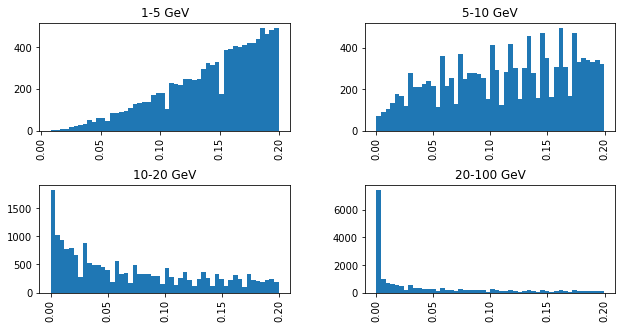

In [17]:
ebins = [1, 5, 10, 20, 100]
labels = [f"{ebins[i]}-{ebins[i+1]} GeV" for i in range(len(ebins)-1)]
neutrinos['ebin'] = pd.cut(neutrinos.energy, ebins, labels=labels)
neutrinos.hist('proba_cscd', by='ebin', bins=50);

## Exercise 7

Create a 2D histogram showing the distribution of the `x` and `y` values of the starting positions (`pos_x` and `pos_y`) of the neutrinos.

### Solution to exercise 7

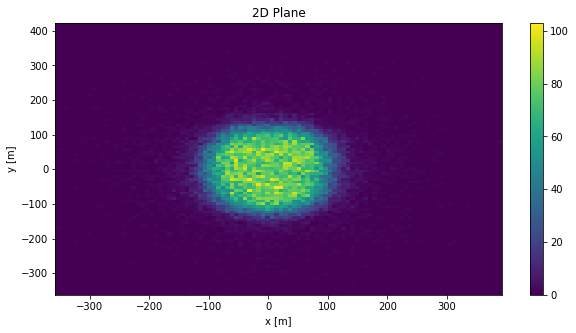

In [18]:
fig, ax = plt.subplots()
counts, xedges, yedges, im = ax.hist2d(data.pos_x, data.pos_y, bins=100, cmap='viridis')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('2D Plane')
fig.colorbar(im);

## Exercise 8

Use `seaborn` (`import seaborn as sns`) to recreate the 2D histogram from Exercise 7. The functions `sns.displot()` or `sns.jointplot()` will be handy.

### Solution to exercise 8

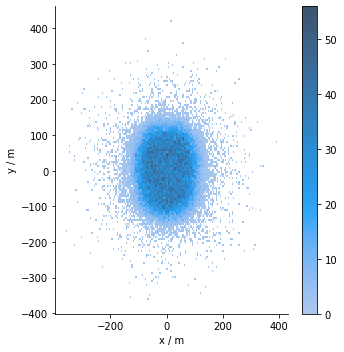

In [19]:
ax = sns.displot(data, x="pos_x", y="pos_y", cbar=True);
ax.set(xlabel="x / m", ylabel="y / m")

Text(27.125, 0.5, 'y / m')

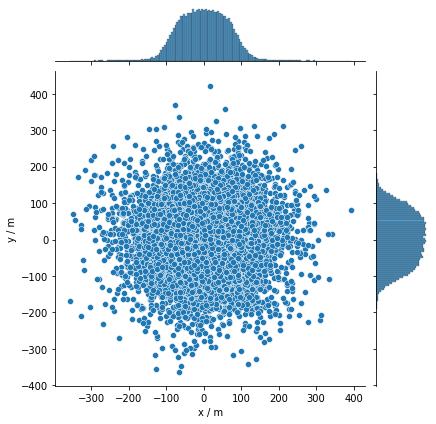

In [20]:
jg = sns.jointplot(data=data, x="pos_x", y="pos_y")
jg.ax_joint.set_xlabel("x / m")
jg.ax_joint.set_ylabel("y / m")

## Exercise 9

Create two histograms of the `azimuth` and `zenith` distribution side by side, in one plot (two subplots).

Try `pandas` built-in matplotlib wrapper and also the raw matplotlib library.

In [21]:
data.head(2)

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z
0,2.349537,1.116004,0.048998,3.3664,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,5.575786,1.742838,0.280471,3.8900,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107


### Solution to exercise 9

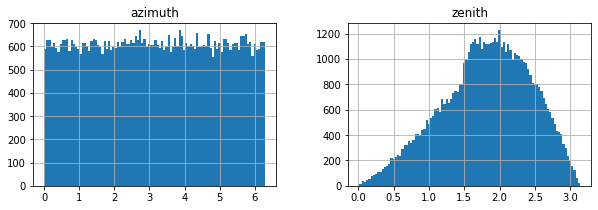

In [22]:
data.hist(['azimuth', 'zenith'], bins=100, figsize=(10, 3));

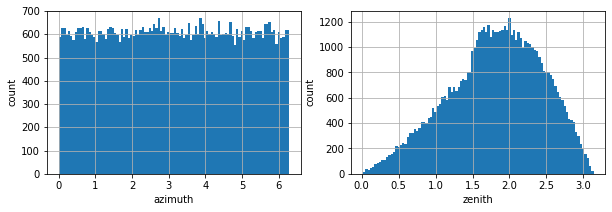

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax = axes[0]
data.azimuth.hist(bins=100, ax=ax)  # zenith=0 is coming from above
ax.set_xlabel('azimuth')
ax.set_ylabel('count')

ax = axes[1]
data.zenith.hist(bins=100, ax=ax)
ax.set_xlabel('zenith')
ax.set_ylabel('count');

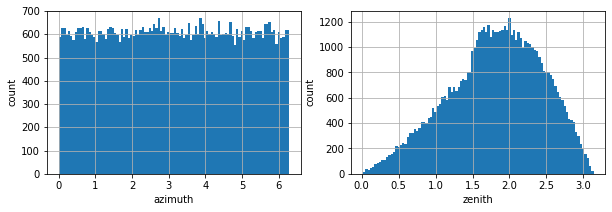

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

for idx, column in enumerate(['azimuth', 'zenith']):
    data[column].hist(bins=100, ax=axes[idx])  # zenith=0 is coming from above
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('count')

## Exercise 10

Split the data into two groups: `upgoing` and `downgoing`, based on the `zenith` value (`zenith == 0` is coming directly from above, `zenith == π` from below).

Try out `sns.stripplot` to verify your "cut" on the data!

### Solution to exercise 10

Here, we are adding a new column to our dataset which contains True/False for each entry, regarding of its zenith direction

In [25]:
data['upgoing'] = data.zenith < np.pi/2

In [26]:
data[['zenith', 'upgoing']].head(3)

,zenith,upgoing
0,1.116004,True
1,1.742838,False
2,2.686909,False


In [27]:
data_by_upgoing = data.groupby('upgoing')

Seaborn automatically recognises the grouped Pandas DataFrame:

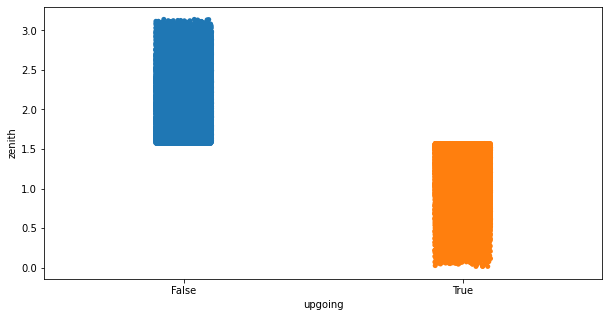

In [28]:
sns.stripplot(x="upgoing", y="zenith", data=data);

## Exercise 11

Create a combined histogram (two histograms overlayed in the same plot) for both `upgoing` and `downgoing` datasets, showing the `zenith` angle.

### Solution to exercise 11

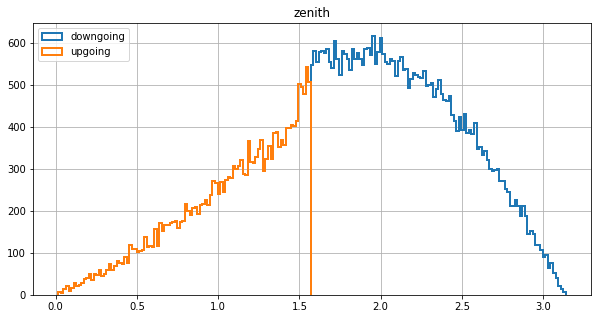

In [29]:
fig, ax = plt.subplots()

for upgoing, sub_data in data_by_upgoing:
    sub_data.hist('zenith', ax=ax, bins=100,
                  label='upgoing' if upgoing else 'downgoing',
                  histtype='step', linewidth=2)
ax.legend();

## Exercise:

Read a KM3NeT Event File (`data/hits.h5`) and examine the PMT signals (`tot`) of the hits (mean, min, max) and also the earliest hit for each digital optical module (identified by `dom_id`) separately . Create a histogram of the `tot` distribution for each module. The function `pd.read_hdf()` is a good start. The dataset path inside the HDF5 file is `/hits`.

In [30]:
import h5py as h5
with h5.File("data/hits.h5") as f:
    print(f.keys())

<KeysViewHDF5 ['hits']>


In [31]:
hits = pd.read_hdf("data/hits.h5", "/hits")

In [32]:
hits

,dom_id,pmt_id,time,tot,triggermask
0,808949902,28,15920424,22,4
1,808949902,30,15920388,28,4
2,808963189,2,15920664,30,6
3,808963189,7,15920663,18,6
4,808963189,11,15920658,27,6
...,...,...,...,...,...
2356,808985283,9,3870706,26,4
2357,808985283,11,3870702,26,4
2358,808985283,16,3870707,6,4
2359,809004291,2,3870610,27,4


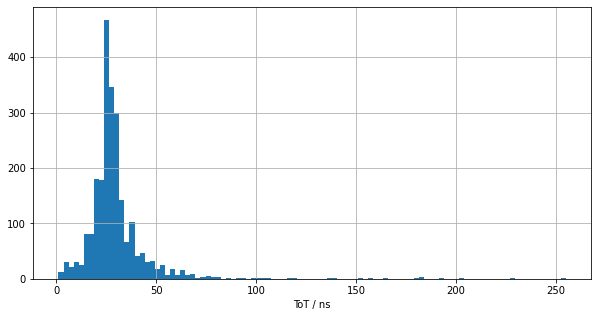

In [33]:
ax = hits.tot.hist(bins=100)  # all PMT signals
ax.set(xlabel="ToT / ns");

In [34]:
hits_by_dom_id = hits.groupby("dom_id")

In [35]:
hits_by_dom_id

In [36]:
hits_by_dom_id.groups.keys()

dict_keys([808432848, 808432849, 808476737, 808483667, 808483678, 808945480, 808945629, 808949646, 808949902, 808963189, 808968978, 808971989, 808982030, 808982065, 808985283, 809004291, 809548770])

In [37]:
for dom_id, dom_hits in hits_by_dom_id:
    print(dom_id)
    print(dom_hits)

808432848
         dom_id  pmt_id      time  tot  triggermask
13    808432848      28  59317389   24            4
35    808432848       3  75610163   25           22
36    808432848       4  75610160   30           22
37    808432848       6  75610160   26           22
38    808432848       8  75610157   38           22
...         ...     ...       ...  ...          ...
2264  808432848       0  96099772   32           22
2265  808432848       5  96099773   30           22
2326  808432848       0  18579789   42           22
2327  808432848       1  18579798   23           22
2328  808432848       5  18579793   30           22

[147 rows x 5 columns]
808432849
         dom_id  pmt_id      time  tot  triggermask
14    808432849      30  59317328   20            4
40    808432849       6  75610081   30           22
41    808432849       8  75610071   29           22
42    808432849      28  75610141   22            4
183   808432849       0  60031724   32            4
...         ...     

In [38]:
hits_by_dom_id.get_group(809548770)

,dom_id,pmt_id,time,tot,triggermask
11,809548770,0,15920482,24,6
12,809548770,28,15920479,28,6
32,809548770,10,79528160,21,6
33,809548770,11,79528157,19,6
34,809548770,12,79528157,25,6
...,...,...,...,...,...
2310,809548770,16,53736218,34,22
2311,809548770,17,53736219,37,22
2312,809548770,20,53736220,25,22
2313,809548770,27,53736223,20,22


In [39]:
hits_by_dom_id["tot"].agg("mean")

dom_id
808432848    28.564626
808432849    37.769912
808476737    28.274390
808483667    29.353383
808483678    26.868687
808945480    30.936782
808945629    28.759398
808949646    27.902778
808949902    37.242424
808963189    26.637931
808968978    29.289062
808971989    26.733766
808982030    29.047120
808982065    29.662338
808985283    28.985507
809004291    27.815385
809548770    26.820000
Name: tot, dtype: float64

In [40]:
hits_by_dom_id["tot"].agg("min")

dom_id
808432848    2
808432849    9
808476737    5
808483667    9
808483678    2
808945480    8
808945629    3
808949646    4
808949902    5
808963189    1
808968978    3
808971989    4
808982030    3
808982065    4
808985283    5
809004291    4
809548770    3
Name: tot, dtype: uint8

In [41]:
hits_by_dom_id["tot"].agg("max")

dom_id
808432848     82
808432849    255
808476737     79
808483667    106
808483678     62
808945480     91
808945629     68
808949646     76
808949902    255
808963189     58
808968978    103
808971989     69
808982030     63
808982065     82
808985283    151
809004291     69
809548770     59
Name: tot, dtype: uint8

In [42]:
hits.sort_values(['dom_id', 'time']).groupby("dom_id").first()

,pmt_id,time,tot,triggermask
dom_id,,,,
808432848,5,4934675,28,4
808432849,5,3075269,27,16
808476737,5,4933532,22,6
808483667,8,4934738,22,4
808483678,0,6197196,34,22
808945480,0,3076435,29,16
808945629,7,4934811,58,4
808949646,7,6905555,49,6
808949902,0,3075703,24,4


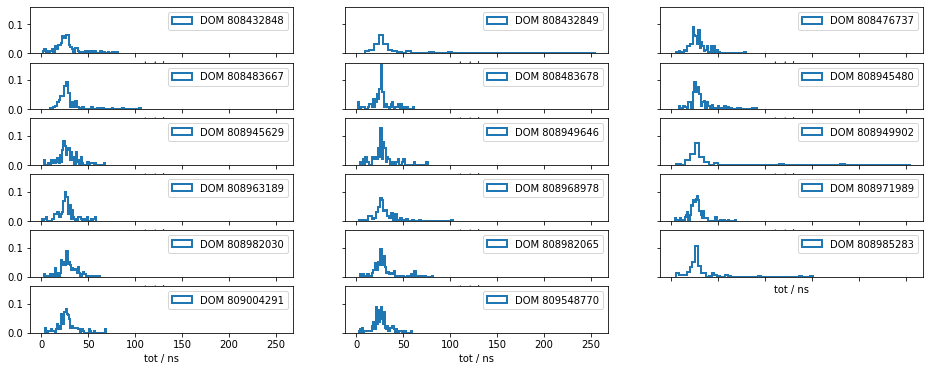

In [43]:
hits_by_dom_id = hits.groupby('dom_id')

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 6), sharex=True, sharey=True)

hist_style = {'bins': 50, 'density': True, 'histtype': 'step', 'linewidth': 2}

for ax in axes.flatten():
    ax.set_axis_off()  # hide all axes and turn them on only when plotting to avoid empty axes

for ax, (dom, _hits) in zip(axes.flatten(), hits_by_dom_id):
    ax.hist(_hits['tot'], label=f"DOM {dom}", **hist_style)
    ax.legend()
    ax.set_xlabel('tot / ns')
    ax.set_axis_on()

### Exercise: Create a histogram of all time differences between consecutive hits calculated on each DOM independently

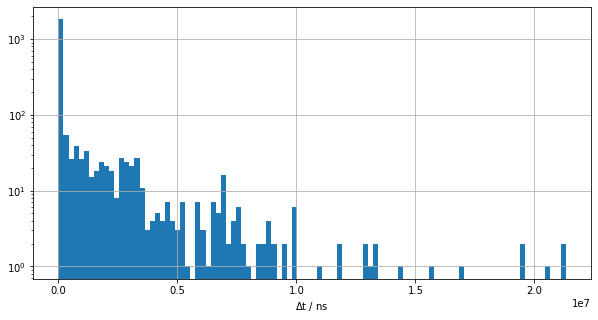

In [44]:
ax = hits.sort_values(['dom_id', 'time']).groupby('dom_id')['time'].agg('diff').hist(bins=100, log=True);
ax.set(xlabel=r"$\Delta$t / ns");

### Exercise: Examine the data for time differences below 50ns

In [45]:
time_diffs = hits.sort_values(['dom_id', 'time']).groupby('dom_id')['time'].agg('diff')

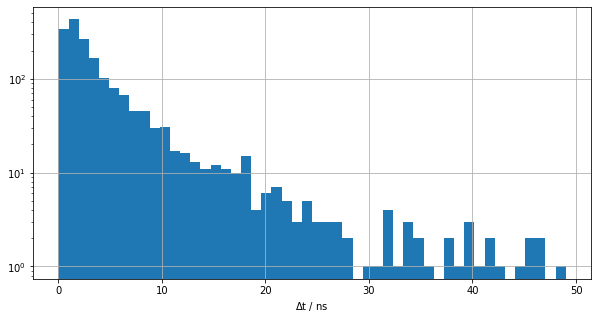

In [46]:
ax = time_diffs[time_diffs < 50].hist(bins=50, log=True);
ax.set_xlabel(r"$\Delta$t / ns");

### Exercise: examine the hits on each PMT of each DOM

Calculate the number of hits and the min/max/mean `tot` for each PMT on each DOM.

In [47]:
hits_by_dom_id_and_pmt_id = hits.groupby(["dom_id", "pmt_id"])

In [48]:
list(hits_by_dom_id_and_pmt_id.groups.keys())[:6]

[(808432848, 0),
 (808432848, 1),
 (808432848, 2),
 (808432848, 3),
 (808432848, 4),
 (808432848, 5)]

In [49]:
hits_by_dom_id_and_pmt_id.get_group((808432848, 3))

,dom_id,pmt_id,time,tot,triggermask
35,808432848,3,75610163,25,22
489,808432848,3,73595706,26,22
663,808432848,3,58998874,19,22
909,808432848,3,75455015,2,22
1260,808432848,3,56939545,20,4
1480,808432848,3,10769186,5,22
1712,808432848,3,4972133,22,22
1713,808432848,3,4972156,25,22
1881,808432848,3,26984956,21,22


In [50]:
hits_analysis = hits_by_dom_id_and_pmt_id["tot"].agg(["mean", "min", "max", "count"])

In [51]:
hits_analysis

mean  min  max  count
dom_id    pmt_id                            
808432848 0       27.083333   16   42     12
          1       23.285714   11   32      7
          2       24.875000    9   51      8
          3       18.333333    2   26      9
          4       30.111111    4   67      9
...                     ...  ...  ...    ...
809548770 26       9.000000    9    9      1
          27      22.250000    3   37      8
          28      26.000000   23   28      4
          29      36.000000   34   38      2
          30      26.250000    5   38      4

[491 rows x 4 columns]

In [52]:
hits_analysis.rename(columns={"count": "n_hits"})

mean  min  max  n_hits
dom_id    pmt_id                             
808432848 0       27.083333   16   42      12
          1       23.285714   11   32       7
          2       24.875000    9   51       8
          3       18.333333    2   26       9
          4       30.111111    4   67       9
...                     ...  ...  ...     ...
809548770 26       9.000000    9    9       1
          27      22.250000    3   37       8
          28      26.000000   23   28       4
          29      36.000000   34   38       2
          30      26.250000    5   38       4

[491 rows x 4 columns]

### Custom aggregation functions and a word on performance

In [53]:
rng = np.random.default_rng(42)  # initialise our random number generator

N = 1_000_000
pmt_id = rng.integers(0, 10, N)
quantum_efficiency = rng.random(N)

In [54]:
pmt_id, quantum_efficiency

(array([0, 7, 6, ..., 9, 0, 1]),
 array([0.36055581, 0.05036582, 0.97409122, ..., 0.60500792, 0.04017111,
        0.06131384]))

In [55]:
df = pd.DataFrame({"pmt_id": pmt_id, "quantum_efficiency": quantum_efficiency})

In [56]:
df.head()

,pmt_id,quantum_efficiency
0,0,0.360556
1,7,0.050366
2,6,0.974091
3,4,0.571595
4,4,0.776772


In [57]:
%timeit df.groupby(pmt_id).mean()

15.5 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [58]:
def slow_mean(values):
    return sum(values)/len(values)

In [59]:
%timeit df.groupby(pmt_id).agg(slow_mean)

143 ms ± 424 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [60]:
%timeit df.groupby(pmt_id).agg(slow_mean, engine="cython")

143 ms ± 922 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
%shorterr df.groupby(pmt_id).agg(slow_mean, engine="numba")

NumbaUtilError: The first 2 arguments to slow_mean must be ['values', 'index']


In [62]:
def slow_mean_numba(values, index):
    return np.sum(values) / len(values)

In [63]:
%timeit df.groupby(pmt_id).agg(slow_mean_numba, engine="numba")

42.9 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
